In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import Request, urlopen
import io
import zipfile

plt.style.use('bmh')
%matplotlib inline

In [2]:
df_casos = pd.read_csv('./dataframes/boletim-ep.csv.gz')
df_casos['date'] = pd.to_datetime(df_casos['date'])
df_casos['last_available_date'] = pd.to_datetime(df_casos['last_available_date'])

In [3]:
df_casos.head(5)

city  city_ibge_code       date  epidemiological_week  \
0  São Paulo       3550308.0 2020-02-25                     9   
1        NaN            35.0 2020-02-25                     9   
2  São Paulo       3550308.0 2020-02-26                     9   
3        NaN            35.0 2020-02-26                     9   
4  São Paulo       3550308.0 2020-02-27                     9   

   estimated_population  estimated_population_2019  is_last  is_repeated  \
0            12325232.0                 12252023.0    False        False   
1            46289333.0                 45919049.0    False        False   
2            12325232.0                 12252023.0    False        False   
3            46289333.0                 45919049.0    False        False   
4            12325232.0                 12252023.0    False        False   

   last_available_confirmed  last_available_confirmed_per_100k_inhabitants  \
0                         1                                        0.00811   
1                         1                                        0.00216   
2                         1                                        0.00811   
3                         1                                        0.00216   
4                         1                                        0.00811   

  last_available_date  last_available_death_rate  last_available_deaths  \
0          2020-02-25                        0.0                      0   
1          2020-02-25                        0.0                      0   
2          2020-02-26                        0.0                      0   
3          2020-02-26                        0.0                      0   
4          2020-02-27                        0.0                      0   

   order_for_place place_type state  new_confirmed  new_deaths  
0                1       city    SP              1           0  
1                1      state    SP              1           0  
2                2       city    SP              0           0  
3                2      state    SP              0           0  
4                3       city    SP              0           0

Parece que os dados de cidades e estados estão misturados, sendo diferenciados pelo place_type. Vamos separar dados de estados e cidades em dois DataFrames separados e comparar os valores.

In [4]:
cidades = df_casos.place_type == 'city'
df_casos[cidades]

city  city_ibge_code       date  epidemiological_week  \
0           São Paulo       3550308.0 2020-02-25                     9   
2           São Paulo       3550308.0 2020-02-26                     9   
4           São Paulo       3550308.0 2020-02-27                     9   
6           São Paulo       3550308.0 2020-02-28                     9   
8           São Paulo       3550308.0 2020-02-29                     9   
...               ...             ...        ...                   ...   
1168999    Tocantínia       1721109.0 2020-12-04                    49   
1169000      Tupirama       1721257.0 2020-12-04                    49   
1169001    Tupiratins       1721307.0 2020-12-04                    49   
1169002  Wanderlândia       1722081.0 2020-12-04                    49   
1169003       Xambioá       1722107.0 2020-12-04                    49   

         estimated_population  estimated_population_2019  is_last  \
0                  12325232.0                 12252023.0    False   
2                  12325232.0                 12252023.0    False   
4                  12325232.0                 12252023.0    False   
6                  12325232.0                 12252023.0    False   
8                  12325232.0                 12252023.0    False   
...                       ...                        ...      ...   
1168999                7617.0                     7545.0    False   
1169000                1922.0                     1891.0    False   
1169001                2729.0                     2671.0    False   
1169002               11734.0                    11683.0    False   
1169003               11520.0                    11540.0    False   

         is_repeated  last_available_confirmed  \
0              False                         1   
2              False                         1   
4              False                         1   
6              False                         2   
8              False                         2   
...              ...                       ...   
1168999         True                       422   
1169000         True                       108   
1169001         True                        18   
1169002         True                       414   
1169003         True                      1015   

         last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                              0.00811          2020-02-25   
2                                              0.00811          2020-02-26   
4                                              0.00811          2020-02-27   
6                                              0.01623          2020-02-28   
8                                              0.01623          2020-02-29   
...                                                ...                 ...   
1168999                                     5540.23894          2020-12-03   
1169000                                     5619.14672          2020-12-03   
1169001                                      659.58226          2020-12-03   
1169002                                     3528.20862          2020-12-03   
1169003                                     8810.76389          2020-12-03   

         last_available_death_rate  last_available_deaths  order_for_place  \
0                           0.0000                      0                1   
2                           0.0000                      0                2   
4                           0.0000                      0                3   
6                           0.0000                      0                4   
8                           0.0000                      0                5   
...                            ...                    ...              ...   
1168999                     0.0118                      5              200   
1169000                     0.0185                      2              196   
1169001                     0.0000                      0  

## Plot de casos total

<AxesSubplot:title={'center':'Quantidade de casos confirmados no brasil'}, xlabel='date'>

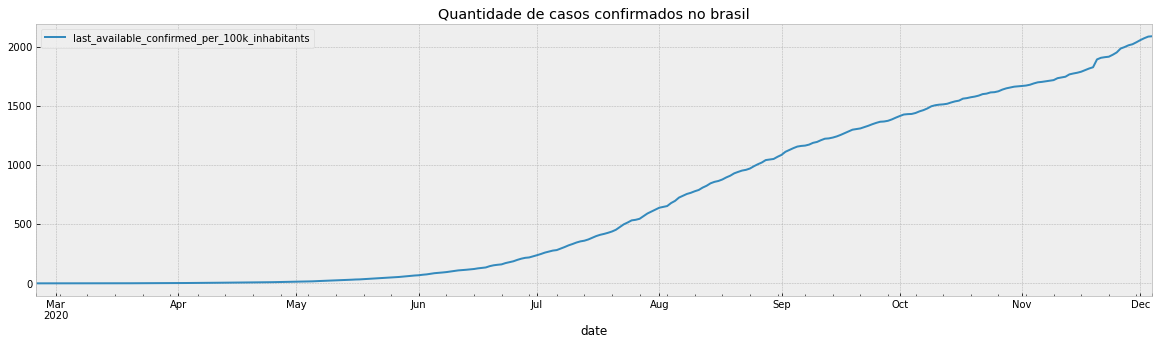

In [5]:
df_casos[cidades][['date','last_available_confirmed_per_100k_inhabitants']].groupby('date').median().plot.line(figsize=(20,5),title='Quantidade de casos confirmados no brasil')
#df_casos.set_index('date')['last_available_confirmed']

## Plot de casos por cidade

<AxesSubplot:xlabel='date'>

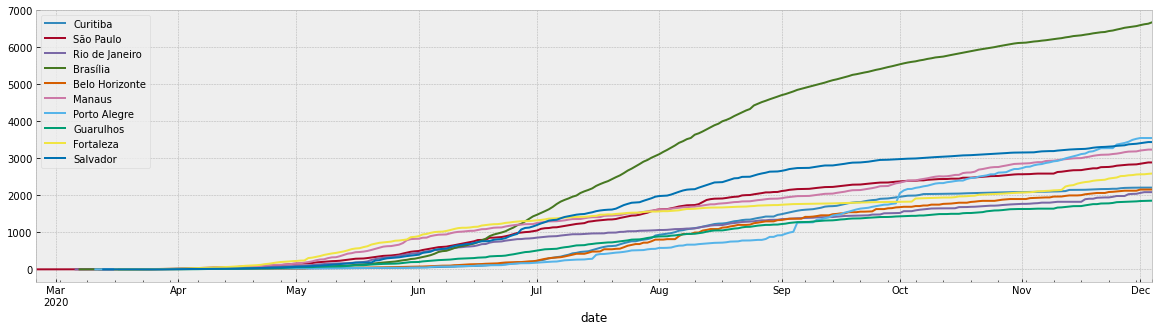

In [16]:
frame = { 
            'Curitiba': df_casos[df_casos['city'] == 'Curitiba'].set_index('date')['last_available_confirmed_per_100k_inhabitants'], 
            'São Paulo': df_casos[df_casos['city'] == 'São Paulo'].set_index('date')['last_available_confirmed_per_100k_inhabitants'],
            'Rio de Janeiro': df_casos[df_casos['city'] == 'Rio de Janeiro'].set_index('date')['last_available_confirmed_per_100k_inhabitants'],
            'Brasília': df_casos[df_casos['city'] == 'Brasília'].set_index('date')['last_available_confirmed_per_100k_inhabitants'], 
            'Belo Horizonte': df_casos[df_casos['city'] == 'Belo Horizonte'].set_index('date')['last_available_confirmed_per_100k_inhabitants'],
            'Manaus': df_casos[df_casos['city'] == 'Manaus'].set_index('date')['last_available_confirmed_per_100k_inhabitants'],
            'Porto Alegre': df_casos[df_casos['city'] == 'Porto Alegre'].set_index('date')['last_available_confirmed_per_100k_inhabitants'], 
            'Guarulhos': df_casos[df_casos['city'] == 'Guarulhos'].set_index('date')['last_available_confirmed_per_100k_inhabitants'],
            'Fortaleza': df_casos[df_casos['city'] == 'Fortaleza'].set_index('date')['last_available_confirmed_per_100k_inhabitants'],
            'Salvador': df_casos[df_casos['city'] == 'Salvador'].set_index('date')['last_available_confirmed_per_100k_inhabitants']
        } 

df_cities = pd.DataFrame(frame)

df_cities.plot.line(figsize=(20,5))

<AxesSubplot:xlabel='date'>

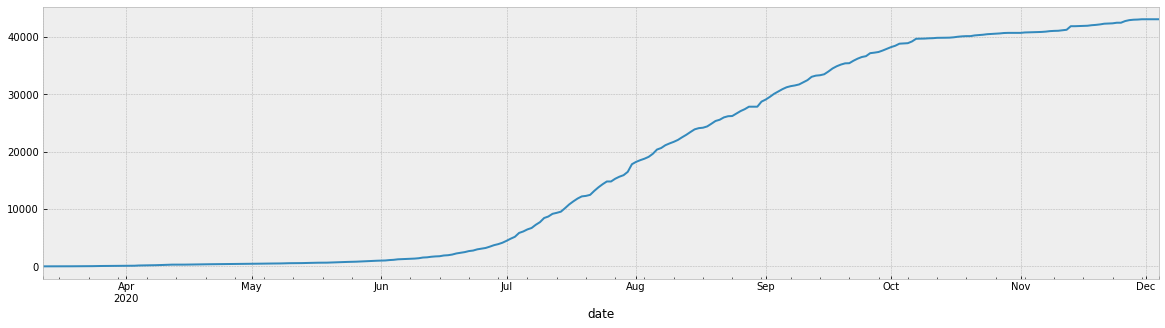

In [7]:
df_casos[df_casos['city'] == 'Curitiba'].set_index('date')['last_available_confirmed'].plot.line(figsize=(20,5))

<AxesSubplot:xlabel='date'>

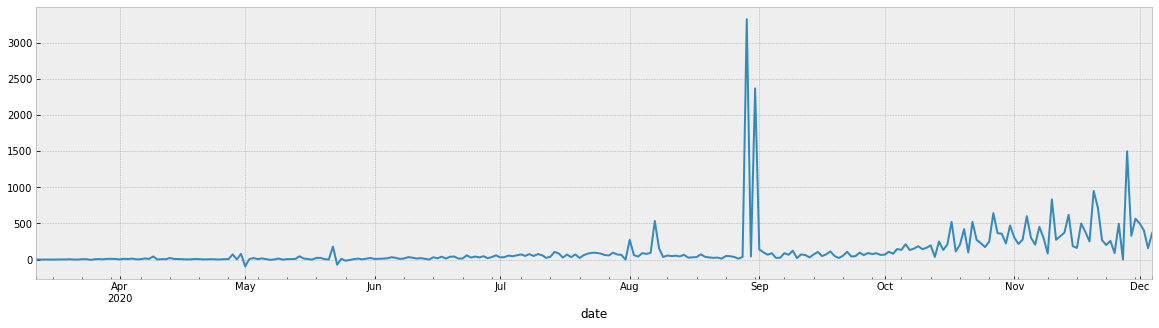

In [8]:
df_casos[df_casos['city'] == 'Florianópolis'].set_index('date')['new_confirmed'].plot.line(figsize=(20,5))

## Plot de casos por estado

Não consegui fazer ainda =\


In [9]:
#df_states = df_casos[df_casos['state'] == 'SP'][['date','last_available_confirmed_per_100k_inhabitants']].groupby('date').agg('sum')
##df_states = df_states.merge(df_casos[df_casos['state'] == 'SP'][['date','last_available_confirmed_per_100k_inhabitants']].groupby('date').agg('sum'))
#df_states
#df_cities.plot.line(figsize=(25,5))

## Plot de novas mortes por dia

Há alguns números negativos, precisamos verificar pq

<AxesSubplot:title={'center':'Casos por semana epidemiológica no Brasil'}, xlabel='epidemiological_week'>

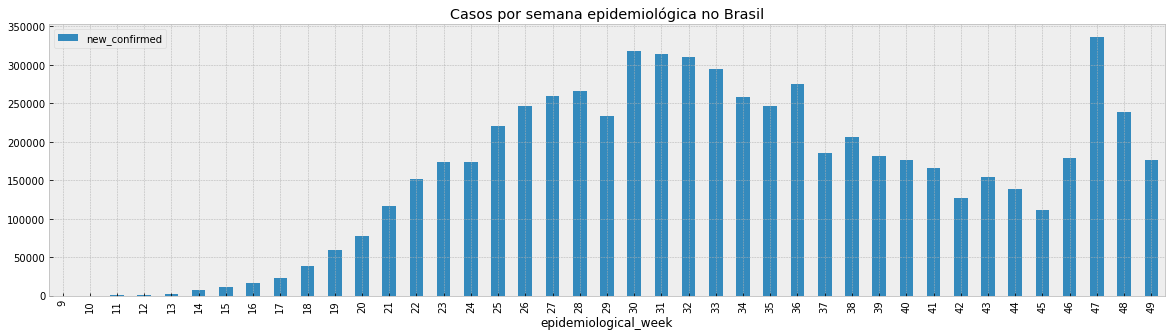

In [10]:
df_casos[cidades][['epidemiological_week','new_confirmed']].groupby('epidemiological_week').sum().plot.bar(figsize=(20,5),title='Casos por semana epidemiológica no Brasil')

<AxesSubplot:title={'center':'Mortes por semana epidemiológica no Brasil'}, xlabel='epidemiological_week'>

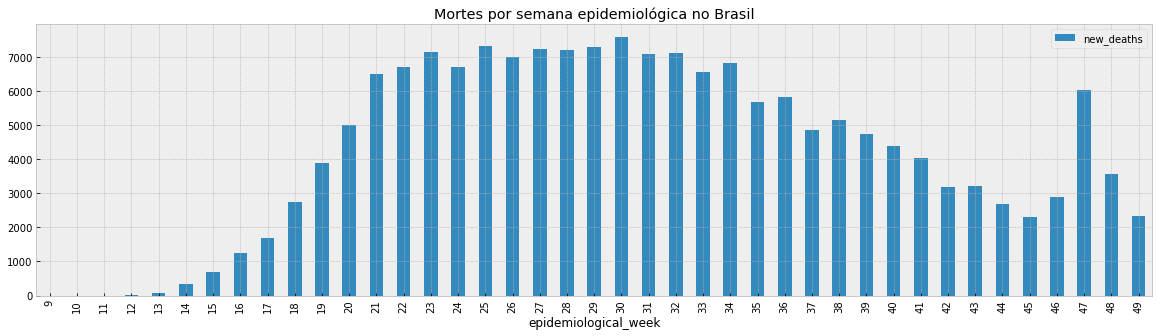

In [11]:
df_casos[cidades][['epidemiological_week','new_deaths']].groupby('epidemiological_week').sum().plot.bar(figsize=(20,5),title='Mortes por semana epidemiológica no Brasil')

<AxesSubplot:title={'center':'Casos por semana epidemiológica em Curitiba'}, xlabel='epidemiological_week'>

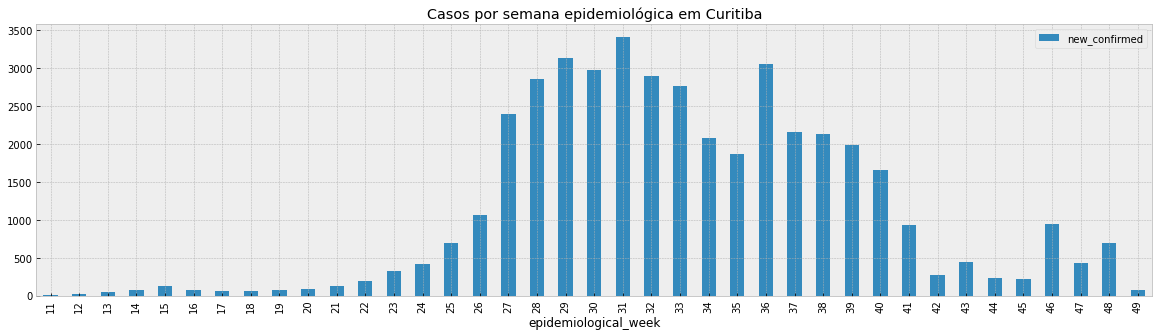

In [12]:
df_casos[df_casos['city'] == 'Curitiba'][['epidemiological_week','new_confirmed']].groupby('epidemiological_week').sum().plot.bar(figsize=(20,5),title='Casos por semana epidemiológica em Curitiba')

<AxesSubplot:title={'center':'Mortes por semana epidemiológica em Curitiba'}, xlabel='epidemiological_week'>

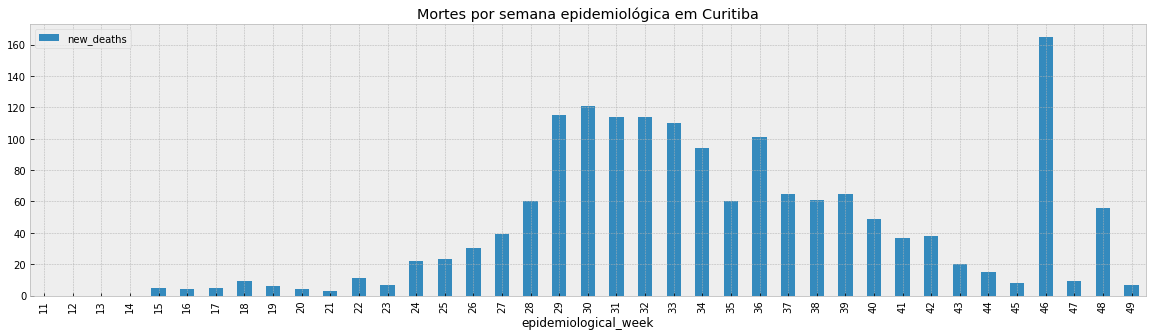

In [13]:
df_casos[df_casos['city'] == 'Curitiba'][['epidemiological_week','new_deaths']].groupby('epidemiological_week').sum().plot.bar(figsize=(20,5),title='Mortes por semana epidemiológica em Curitiba')